# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Objetive is to predict car price that could benefit both Customer and Dealers, or in other words,
# define features which have high positive correlation with 'price' and 'car value' (factor to be defined), 
# and a dealer should select cars with parameters which shows high correlation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/vehicles.csv')

In [4]:
df.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [7]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
1%,7.301962e+09,0.000000e+00,1967.000000,2.000000e+00
5%,7.303150e+09,0.000000e+00,1998.000000,6.318000e+03
10%,7.304399e+09,5.000000e+02,2003.000000,1.493900e+04
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [8]:
# Understand Data Types, number of null values and unique values for each column
# Understand values in String/Object/Categorical features to evaluate if they can be converted into 'dummies' column
# Understand if there is need to replace String/Object values into new values to group them into smaller number of similar categories

# Model feature/columns seems like a composite of various car features like Model Name and Body type thus, 
# we might either need to split it into two columns and evalute if there is need for "Body Type" as there is another column 'type' which has similar information
# or drop the 'Model' feature from dataset or else use 'type' and drop "Model Name" or features extracted out of it

# Estimate standard statistics for Numberical Data types
# Plot bar graphs, scatter plots or histograms to understand data distribution

# Convert Model Year to 'age' of car

# Region and State features have common values and 'Region' has 404 unique values thus, will be difficult to model as 'dummies' 

# VIN number is unique identifier for each car and would have no relationship with car price so it can be dropped
# Only 30% of data points have value in 'Size' feature thus, it should be dropped
# Understand if 'paint/color' feature should be dropped as 30% of the values are missing
# Understand if 'drive' feature should be dropped as 30% of the values are missing or should a separate model be created with just 70% of the dataset

# Understand if there is any colinearity between 'Condition', 'Odometer Reading' and 'Year' or 'Age' or drop 'condition' columns as have 40% data missing



In [9]:
df_clean = df.dropna(subset=['year']).set_index('id')
df_clean['age'] = 2022 - df_clean['year'] 

In [10]:
df_clean.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,price,year,odometer,age
count,4.256750e+05,425675.000000,4.213440e+05,425675.000000
mean,7.530564e+04,2011.235191,9.822513e+04,10.764809
std,1.219951e+07,9.452120,2.141207e+05,9.452120
min,0.000000e+00,1900.000000,0.000000e+00,0.000000
1%,0.000000e+00,1967.000000,2.000000e+00,2.000000
5%,0.000000e+00,1998.000000,6.395000e+03,2.000000
10%,5.000000e+02,2003.000000,1.504120e+04,3.000000
25%,5.900000e+03,2008.000000,3.795100e+04,5.000000
50%,1.390000e+04,2013.000000,8.582750e+04,9.000000
75%,2.600000e+04,2017.000000,1.338000e+05,14.000000


In [11]:
df_objects = df_clean.select_dtypes(include=['object'])

#df_features = pd.DataFrame(columns = [['features','values']])

for i, columns in enumerate(df_objects):
    #df_features['features'] = df_features.append(columns)
    #df_features['values'] = df_features.append(str(df_objects[columns].unique()))
    print(columns,str(df_objects[columns].unique()),str(df_objects[columns].isna().sum()))
#df_features

region ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'northwest CT' 'washington, 

In [12]:
df_clean['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [13]:
df_clean['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

In [14]:
df_clean['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [15]:
df_clean['title_status'].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

In [16]:
df_clean['type'].value_counts()

sedan          86860
SUV            76981
pickup         43128
truck          35279
other          22110
coupe          19181
hatchback      16588
wagon          10751
van             8457
convertible     7722
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [17]:
df_clean['condition'].value_counts()

good         121456
excellent    101457
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

In [18]:
df_clean['cylinders'].value_counts()

6 cylinders     93700
4 cylinders     77293
8 cylinders     71776
5 cylinders      1712
10 cylinders     1448
other            1298
3 cylinders       648
12 cylinders      209
Name: cylinders, dtype: int64

In [19]:
df_clean['drive'].value_counts()

4wd    131515
fwd    105138
rwd     58755
Name: drive, dtype: int64

In [20]:
df_clean['title_status'].value_counts()

clean         404334
rebuilt         7109
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [21]:
df_clean['size'].value_counts()

full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: size, dtype: int64

In [22]:
df_clean['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2107
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [23]:
df_clean[['manufacturer','model']].value_counts()

manufacturer  model                
ford          f-150                    8009
chevrolet     silverado 1500           5140
ram           1500                     4069
toyota        camry                    3133
chevrolet     silverado                3021
                                       ... 
mazda         3 hatchback 2.5             1
              3 i grand touring           1
              3 i gt                      1
ford          edge sel awdcrossover       1
acura         2002 rsx type s             1
Length: 24167, dtype: int64

In [24]:
df_clean['state'].value_counts()

ca    50498
fl    28440
tx    22897
ny    19374
oh    17688
or    17103
mi    16897
nc    15274
wa    13757
pa    13743
wi    11394
tn    11040
co    11009
va    10730
il    10377
nj     9729
id     8961
az     8613
ia     8390
ma     8173
mn     7691
ga     6990
ok     6792
sc     6326
mt     6254
ks     6206
in     5704
ct     5186
al     4896
md     4775
nm     4388
mo     4293
ky     4147
ar     4029
ak     3473
la     3179
nv     3133
nh     2979
me     2966
dc     2956
hi     2924
vt     2513
ri     2320
sd     1302
ut     1149
wv     1050
ms      999
ne      999
de      949
wy      610
nd      410
Name: state, dtype: int64

In [25]:
# Merging type which are same for eg: 'pickup' is same as 'truck' or 'hatchback' same as 'wagon' etc. Might update 'Other' 
# to it's category or else 'drop it

df_clean['type'] = df_clean['type'].str.replace('pickup','truck')
df_clean['type'] = df_clean['type'].str.replace('hatchback','wagon')
df_clean['type'] = df_clean['type'].str.replace('mini-van','van')
df_clean['type'] = df_clean['type'].str.replace('offroad','SUV')

In [26]:
df_clean['model_split'] = df_clean['model'].str.split(" ")
df_clean['model2'] = df_clean['model_split'].str[0]
df_clean['model3'] = df_clean['model_split'].str[1]

In [27]:
# splitting model column into two columns model2 and model3 where model2 column holds 'product type' 
# and 'model 3' is variation of the product type
df_clean.drop('model_split', axis=1, inplace = True)

In [28]:
df_clean['model2'] = df_clean['model2'].str.replace("-","")

In [29]:
df_clean['model2'].value_counts()

silverado            17084
f150                 15837
1500                  9207
sierra                8566
wrangler              8049
                     ...  
1D7HU18P17S122398        1
Kisser                   1
explrer                  1
challegner               1
gand                     1
Name: model2, Length: 4921, dtype: int64

In [30]:
df_clean['model3'].value_counts()

1500         14367
sport         6759
se            5404
super         5228
series        5117
             ...  
150xl            1
rx350            1
yz               1
Torino           1
Glenbrook        1
Name: model3, Length: 4788, dtype: int64

In [31]:
df_clean.nunique()

region             404
price            15564
year               114
manufacturer        42
model            29466
condition            6
cylinders            8
fuel                 5
odometer        104630
title_status         6
transmission         3
VIN             117655
drive                3
size                 4
type                 9
paint_color         12
state               51
age                114
model2            4921
model3            4788
dtype: int64

In [32]:
# If we eliminate rows with model3 value counts <10 than it impacts impact data set significantly and thus, we will drop model3 column 
#counts = df_clean['model3'].value_counts()
#mask = counts >=10
#select_model3 = counts[mask].index
#df_clean_model = df_clean.loc[df_clean['model3'].isin(select_model3)]
df_clean.drop('model3', axis = 1, inplace = True)

In [33]:
# After running regression it was observed that Manufacturer that have high positive importance value 
# but their models have large negative importance value so will need to merge Manufacturer and model into one feature

df_clean['mfg model'] = df_clean['manufacturer'] + "-" + df_clean['model2']
df_clean.drop(['manufacturer','model2'], axis =1,inplace = True)

In [34]:
#eliminating rows with mfg - model feature values count is less than 1000

counts = df_clean['mfg model'].value_counts()
mask = counts >=1000
select_model2 = counts[mask].index
df_clean = df_clean.loc[df_clean['mfg model'].isin(select_model2)]


In [35]:
# Keepin only 'clean' car status and dropping others
df_clean = df_clean.loc[df_clean['title_status']=='clean']

# Dropping title_status as only 'clean' titles are used in dataset 
df_clean.drop('title_status', axis =1, inplace = True)

In [36]:
# we will drop model column and only use model2 column with 952 unique values but if it will be difficult to process than we might to drop certain models with low count
df_clean.drop('model', axis = 1, inplace = True)
df_clean.nunique()

region            404
price           12553
year               80
condition           6
cylinders           8
fuel                5
odometer        77328
transmission        3
VIN             77891
drive               3
size                4
type                9
paint_color        12
state              51
age                80
mfg model         105
dtype: int64

In [37]:
''' No need for this part of code as mfg model column should address it
counts = df_clean['manufacturer'].value_counts()
mask = counts > 200
select_mfg = counts[mask].index
df_clean = df_clean.loc[df_clean['manufacturer'].isin(select_mfg)]
'''

" No need for this part of code as mfg model column should address it\ncounts = df_clean['manufacturer'].value_counts()\nmask = counts > 200\nselect_mfg = counts[mask].index\ndf_clean = df_clean.loc[df_clean['manufacturer'].isin(select_mfg)]\n"

In [38]:
df_clean.nunique()

region            404
price           12553
year               80
condition           6
cylinders           8
fuel                5
odometer        77328
transmission        3
VIN             77891
drive               3
size                4
type                9
paint_color        12
state              51
age                80
mfg model         105
dtype: int64

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266921 entries, 7316814884 to 7301591140
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        266921 non-null  object 
 1   price         266921 non-null  int64  
 2   year          266921 non-null  float64
 3   condition     150614 non-null  object 
 4   cylinders     157795 non-null  object 
 5   fuel          265749 non-null  object 
 6   odometer      264215 non-null  float64
 7   transmission  265862 non-null  object 
 8   VIN           173699 non-null  object 
 9   drive         193239 non-null  object 
 10  size          73340 non-null   object 
 11  type          211523 non-null  object 
 12  paint_color   188226 non-null  object 
 13  state         266921 non-null  object 
 14  age           266921 non-null  float64
 15  mfg model     266921 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 34.6+ MB


In [40]:
df_clean['transmission'].value_counts()

automatic    217230
other         37114
manual        11518
Name: transmission, dtype: int64

In [41]:
df_clean['fuel'].value_counts()

gas         224766
other        19041
diesel       18290
hybrid        3435
electric       217
Name: fuel, dtype: int64

In [42]:
df_clean['transmission'].value_counts()

automatic    217230
other         37114
manual        11518
Name: transmission, dtype: int64

In [43]:
df_clean['state'].value_counts()

ca    30049
fl    17424
tx    14733
ny    12284
or    11795
oh    10896
mi    10768
nc     9160
wa     9102
pa     7973
co     7088
va     7071
wi     6983
tn     6940
il     6526
id     6261
nj     5783
az     5242
ia     5153
mn     5012
ma     5007
ok     4604
ga     4343
mt     4293
ks     3994
sc     3784
in     3533
al     3198
ct     3112
md     2882
mo     2803
ar     2674
ky     2642
nm     2534
ak     2313
me     2045
la     2043
nh     2031
dc     1786
vt     1747
hi     1723
nv     1688
ri     1275
sd      824
wv      683
ms      669
ne      633
ut      622
de      585
wy      360
nd      248
Name: state, dtype: int64

In [44]:
# dropping electric as very few data points
fuel_to_keep = {'gas','other','diesel','hybrid'}
df_clean = df_clean[df_clean['fuel'].isin(fuel_to_keep)]

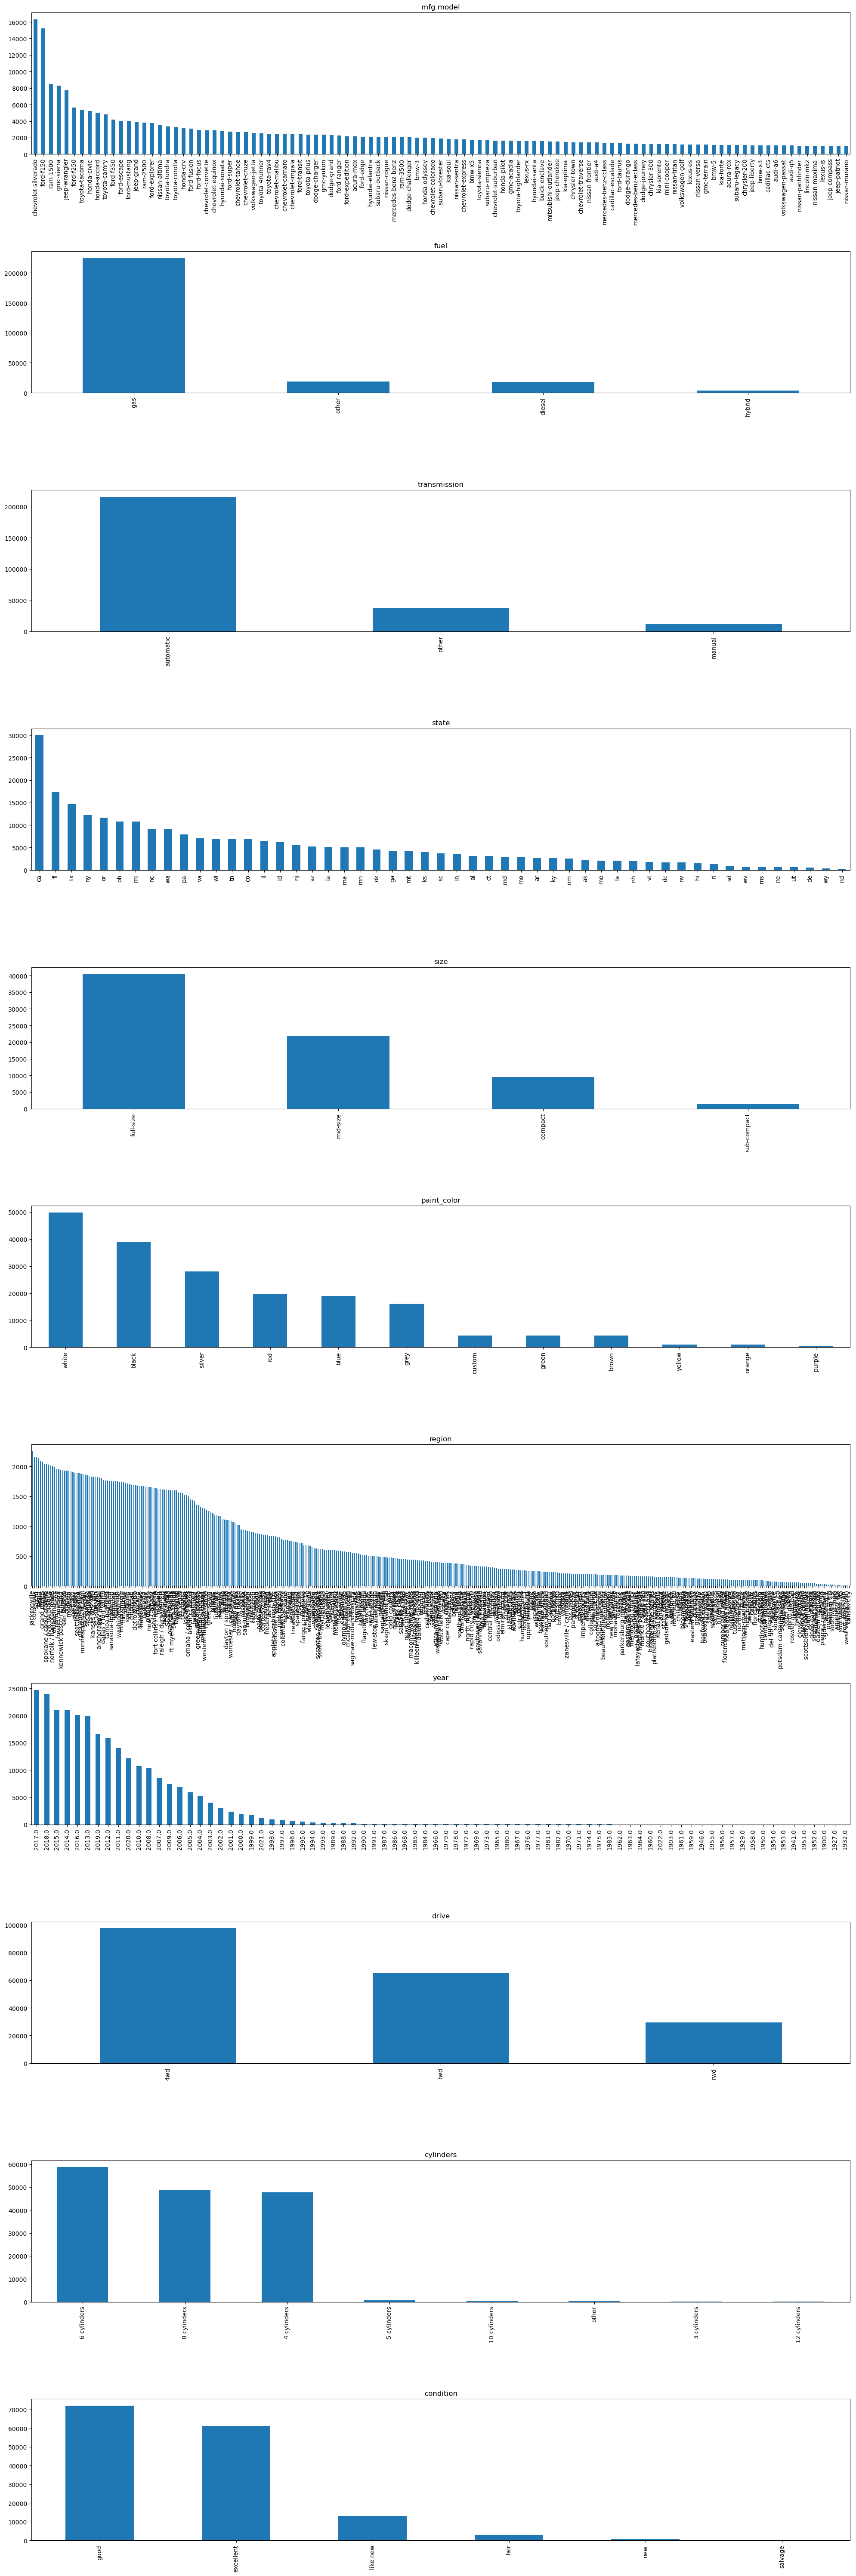

In [45]:
# plot count plots for all categorical variables

cat_plot_vars = ['mfg model','fuel','transmission','state','size','paint_color','region','year','drive','cylinders','condition']
rows = len(cat_plot_vars)

fig, axs = plt.subplots(nrows = rows, figsize = (20,60))

for i, column in enumerate(cat_plot_vars):
    row = i
    #col = i%2
    df_clean[column].value_counts().plot(kind = 'bar', ax =axs[row])
    axs[row].set_title(column)
    fig.tight_layout()
          
plt.show()

In [46]:
to_drop = ['VIN','size','paint_color','region','year','drive','cylinders','condition']
df_clean.drop(labels = to_drop, axis = 1, inplace = True)

In [47]:
# Keeping data where price is more than 1000
df_clean = df_clean[df_clean['price']>1000]

In [48]:
df_clean.dropna(inplace = True)

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184601 entries, 7316814884 to 7301591140
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         184601 non-null  int64  
 1   fuel          184601 non-null  object 
 2   odometer      184601 non-null  float64
 3   transmission  184601 non-null  object 
 4   type          184601 non-null  object 
 5   state         184601 non-null  object 
 6   age           184601 non-null  float64
 7   mfg model     184601 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.7+ MB


In [50]:
df_clean.nunique()

price           10116
fuel                4
odometer        58697
transmission        3
type                9
state              51
age                76
mfg model         105
dtype: int64

In [51]:
# graphing numberical values in box plot 

In [52]:
# there are outliers so it's better to drop outisde of 99% i.e. outliers 
df_clean.describe(percentiles=[0.01,0.05,0.10,0.25,0.5,0.75,0.9,0.95,0.99])

,price,odometer,age
count,1.846010e+05,1.846010e+05,184601.000000
mean,5.692426e+04,9.255245e+04,9.236358
std,9.662723e+06,1.183089e+05,6.142549
min,1.003000e+03,0.000000e+00,0.000000
1%,2.000000e+03,3.580000e+02,2.000000
5%,3.900000e+03,9.313000e+03,2.000000
10%,5.498000e+03,1.650800e+04,3.000000
25%,9.300000e+03,3.664700e+04,5.000000
50%,1.799400e+04,8.500000e+04,8.000000
75%,2.998500e+04,1.330410e+05,12.000000


'\nfor i, column in enumerate(num_plot_vars):\n    mean = df_clean[column].mean()\n    std = df_clean[column].std()\n    lower = max(mean - 3*std,0)\n    upper = mean + 3*std\n    df_clean2 = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]     \n    print(mean,std,lower,upper)\n'

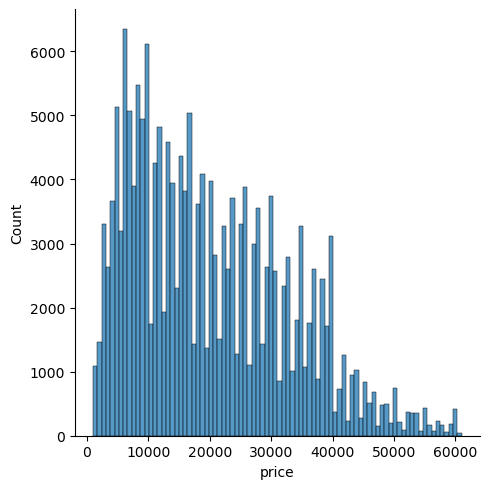

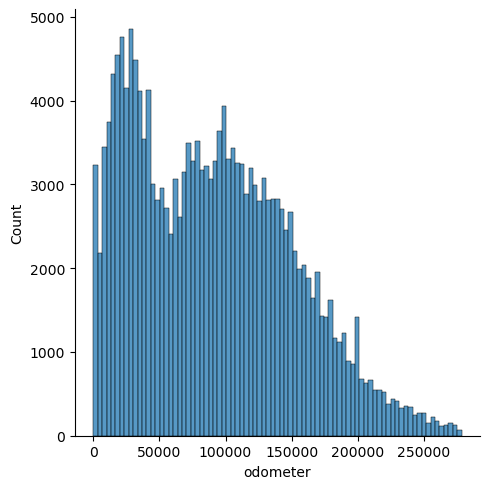

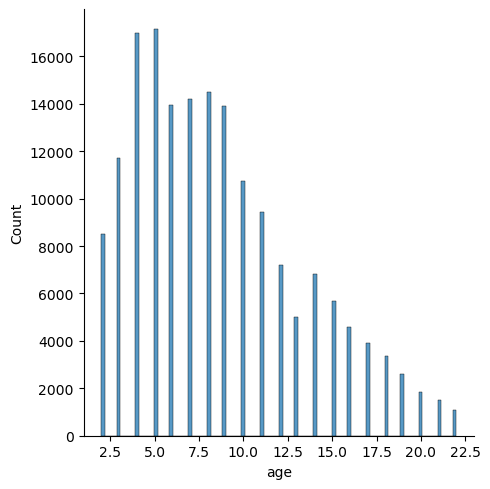

In [53]:
# removing outliers from numberical features

num_plot_vars = ['price','odometer','age']

for i, column in enumerate(num_plot_vars):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5*IQR,1)
    upper = Q3 + 1.5*IQR
    df_clean = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]
    
    sns.displot(df_clean[column])
    #print(column,Q1,Q3,IQR,lower,upper)
  
'''
for i, column in enumerate(num_plot_vars):
    mean = df_clean[column].mean()
    std = df_clean[column].std()
    lower = max(mean - 3*std,0)
    upper = mean + 3*std
    df_clean2 = df_clean[(df_clean[column]>lower) & (df_clean[column] < upper)]     
    print(mean,std,lower,upper)
'''

<Axes: xlabel='price'>

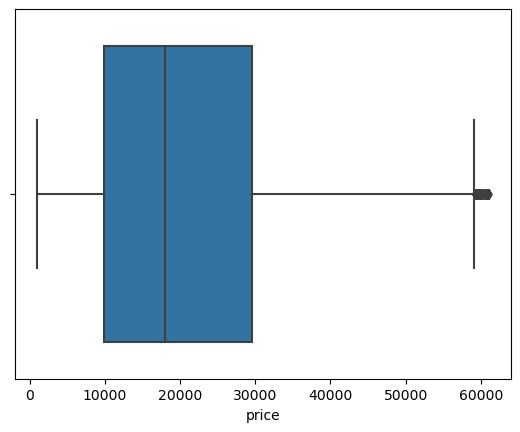

In [54]:
sns.boxplot(x = df_clean['price'])

<Axes: xlabel='odometer'>

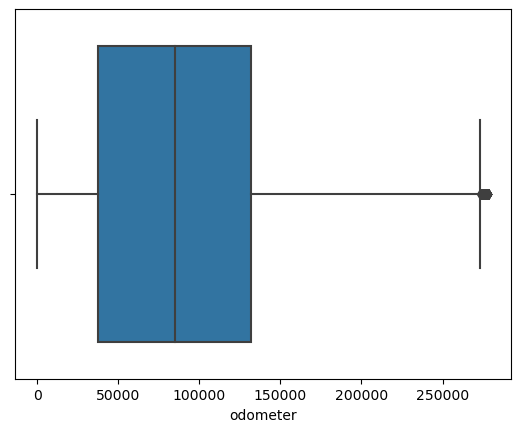

In [55]:
sns.boxplot(x = df_clean['odometer'])

<Axes: xlabel='age'>

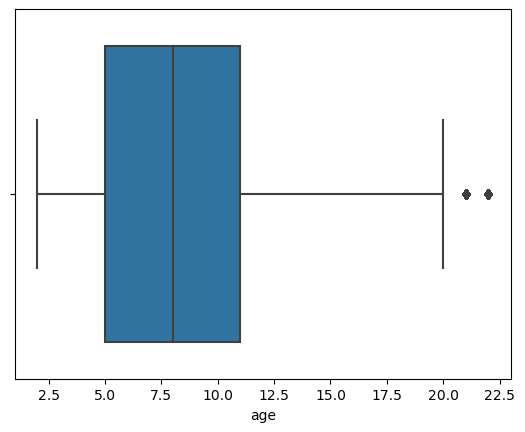

In [56]:
sns.boxplot(x = df_clean['age'])

<Axes: xlabel='age', ylabel='price'>

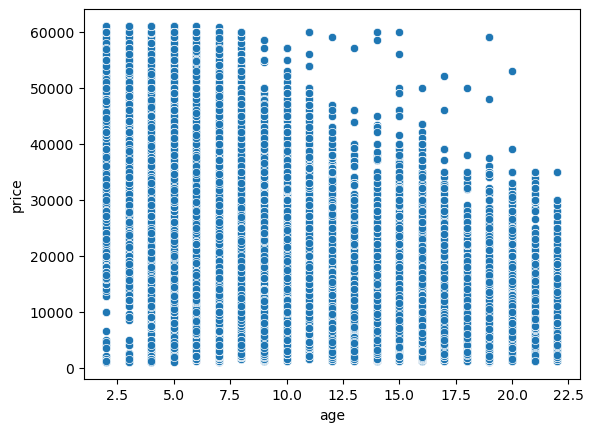

In [57]:
sns.scatterplot(x = df_clean['age'], y = df_clean['price'])

C:\Users\a72016\AppData\Local\Temp\ipykernel_202700\1832626386.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot=True)


<Axes: >

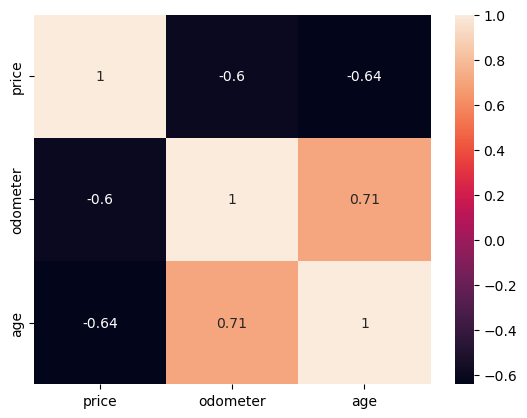

In [58]:
sns.heatmap(df_clean.corr(), annot=True)

In [59]:
df_clean.head()

,price,fuel,odometer,transmission,type,state,age,mfg model
id,,,,,,,,
7316814884,33590,gas,57923.0,other,truck,al,8.0,gmc-sierra
7316814758,22590,gas,71229.0,other,truck,al,12.0,chevrolet-silverado
7316814989,39590,gas,19160.0,other,truck,al,2.0,chevrolet-silverado
7316743432,30990,gas,41124.0,other,truck,al,5.0,toyota-tundra
7316356412,15000,gas,128000.0,automatic,truck,al,9.0,ford-f150


In [60]:
# Odometer and Age have high correlation with each other thus, will check for multi-colliearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

#variables = pd.get_dummies(df_clean,drop_first=True)
variables = df_clean[['price','odometer','age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.519849,price
1,6.448920,odometer
2,6.953981,age


In [61]:
# VIF Is greater than 5 thus, they are collinear so will keep age as easier to communicate with customers   

In [62]:
df_clean = df_clean.drop(['odometer'], axis =1)

In [63]:
# Rechecking collinearity after dropping Odometer

from statsmodels.stats.outliers_influence import variance_inflation_factor

#variables = pd.get_dummies(df_clean,drop_first=True)
variables = df_clean[['price','age']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.51982,price
1,1.51982,age


In [64]:
#F-regression create simple linear regression of each feature
#This method would calculate the F statistic for each of those regressions and return the respective p values

from sklearn.feature_selection import f_regression,SelectKBest

df_clean_dummies = pd.get_dummies(df_clean, drop_first = True)
X = df_clean_dummies.drop('price',axis = 1)
y = df_clean_dummies['price']

f_regression(X,y)

p_values = f_regression(X,y)[1]

p_values.round(3) # This output in scincetific notation array lets convert them using 'round' method


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.03 , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.897, 0.   , 0.   , 0.001, 0.   , 0.   , 0.511, 0.   , 0.   ,
       0.   , 0.   , 0.783, 0.002, 0.   , 0.   , 0.001, 0.   , 0.895,
       0.   , 0.   , 0.009, 0.   , 0.   , 0.002, 0.304, 0.   , 0.   ,
       0.   , 0.621, 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   ,
       0.93 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.028, 0.   ,
       0.   , 0.219, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.009,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.087, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.266, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.   ,
       0.   , 0.   ,

In [65]:
# Creating summary table of encoded features that are not correlated to price and thus, can be dropped from the dataset
model_summry = pd.DataFrame(data=X.columns, columns=['Features'])
model_summry['p-values'] = p_values.round(3)
model_summry[model_summry['p-values']>0.05]

,Features,p-values
18,state_co,0.897
24,state_hi,0.511
29,state_ks,0.783
35,state_mi,0.895
42,state_ne,0.304
46,state_nv,0.621
54,state_sd,0.930
73,mfg model_cadillac-cts,0.219
92,mfg model_dodge-durango,0.087
109,mfg model_gmc-acadia,0.266


In [66]:
# dropping the values that are not correlated with price
state_to_drop = {'co','hi','ks','mi','ne','nv','sd'}
df_clean_pval = df_clean[~df_clean['state'].isin(state_to_drop)]

mfg_to_drop = {'missan_frontier','volkswagen-golf'}
df_clean_pval = df_clean_pval[~df_clean_pval['mfg model'].isin(mfg_to_drop)]
df_clean_pval

type_to_drop = {'bus'}
df_clean_pval = df_clean_pval[~df_clean_pval['type'].isin(type_to_drop)]
df_clean_pval


,price,fuel,transmission,type,state,age,mfg model
id,,,,,,,
7316814884,33590,gas,other,truck,al,8.0,gmc-sierra
7316814758,22590,gas,other,truck,al,12.0,chevrolet-silverado
7316814989,39590,gas,other,truck,al,2.0,chevrolet-silverado
7316743432,30990,gas,other,truck,al,5.0,toyota-tundra
7316356412,15000,gas,automatic,truck,al,9.0,ford-f150
...,...,...,...,...,...,...,...
7301949196,29590,gas,automatic,SUV,wy,6.0,toyota-4runner
7301592119,22990,gas,other,sedan,wy,2.0,hyundai-sonata
7301591201,32590,gas,other,sedan,wy,2.0,mercedes-benz-cclass


In [67]:
'''
X = df_clean_pval.drop(columns = ['price'])
y = df_clean_pval['price']
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

y_pred = pipe_lr.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))
'''

df_clean_pval.groupby('mfg model').mean().round(1)

C:\Users\a72016\AppData\Local\Temp\ipykernel_202700\2334790434.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean_pval.groupby('mfg model').mean().round(1)


,price,age
mfg model,,
acura-mdx,27668.7,6.7
acura-rdx,26709.7,5.1
audi-a4,19036.3,8.6
audi-a6,26534.1,6.3
audi-q5,24745.0,6.4
...,...,...
toyota-sienna,13291.0,11.6
toyota-tacoma,26892.2,8.4
toyota-tundra,29480.0,8.9


In [68]:
# copying the df_cleaned dataset after eliminating features that didn't had any correlation with price
df_clean = df_clean_pval

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157344 entries, 7316814884 to 7301591140
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         157344 non-null  int64  
 1   fuel          157344 non-null  object 
 2   transmission  157344 non-null  object 
 3   type          157344 non-null  object 
 4   state         157344 non-null  object 
 5   age           157344 non-null  float64
 6   mfg model     157344 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.6+ MB


In [70]:
df_clean.nunique()

price           8716
fuel               4
transmission       3
type               8
state             44
age               21
mfg model        104
dtype: int64

In [71]:
# drop all rows with empty cells
'''
df_cleanest = df_clean.dropna()
# dropping all na values reduces the dataset to 127232 rows from 426880 so we will need to compare the orignal dataset to undertand if,
# it is still a good representation of orignal dataset
df_cleanest.info()
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing
# except (few) zero for price and odometer readhing and 1900 for year 
# which we would need to either drop or update with average data of similar model and year!
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])
# checking % of missing value to understand if it's ok to drop null values for that feature/column
df.isna().sum()/df['state'].count()*100
'''

"\ndf_cleanest = df_clean.dropna()\n# dropping all na values reduces the dataset to 127232 rows from 426880 so we will need to compare the orignal dataset to undertand if,\n# it is still a good representation of orignal dataset\ndf_cleanest.info()\n# To check if there are any outliers\n# Here we conclude that we don't have any outliers as the values are gradually increasing\n# except (few) zero for price and odometer readhing and 1900 for year \n# which we would need to either drop or update with average data of similar model and year!\ndf.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])\n# checking % of missing value to understand if it's ok to drop null values for that feature/column\ndf.isna().sum()/df['state'].count()*100\n"

In [72]:
X = df_clean.drop(columns = ['price'])
y = df_clean['price']

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157344 entries, 7316814884 to 7301591140
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fuel          157344 non-null  object 
 1   transmission  157344 non-null  object 
 2   type          157344 non-null  object 
 3   state         157344 non-null  object 
 4   age           157344 non-null  float64
 5   mfg model     157344 non-null  object 
dtypes: float64(1), object(5)
memory usage: 8.4+ MB


In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

In [75]:
# Creating Train and Test Data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1000)

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110140 entries, 7307025042 to 7305102937
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   fuel          110140 non-null  object 
 1   transmission  110140 non-null  object 
 2   type          110140 non-null  object 
 3   state         110140 non-null  object 
 4   age           110140 non-null  float64
 5   mfg model     110140 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.9+ MB


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47204 entries, 7316666325 to 7315082848
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fuel          47204 non-null  object 
 1   transmission  47204 non-null  object 
 2   type          47204 non-null  object 
 3   state         47204 non-null  object 
 4   age           47204 non-null  float64
 5   mfg model     47204 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.5+ MB


In [78]:
# Step 1 will be Column Transformation to convert Categorical values to numerical values
step1 = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(sparse = False),[0,1,2,3,5])],remainder='passthrough')

In [79]:
step2 = LinearRegression()

In [80]:
pipe_lr = Pipeline([('step1',step1),
                 ('step2',step2)])

In [81]:
pipe_lr.fit(X_train,y_train)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3, 5])])),
                ('step2', LinearRegression())])

In [82]:
y_pred = pipe_lr.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

mse is 32301763.04453593
r2-score is 0.7504745761614126


In [83]:
y_pred = pipe_lr.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))

mse is 32592280.838288333
r2-score is 0.7484639292342472


In [84]:
features_names = pipe_lr.named_steps['step1'].get_feature_names_out()
importance = pipe_lr.named_steps['step2'].coef_

In [85]:
lr_features = pd.DataFrame({'feature':features_names, 'importance':importance})
lr_features = lr_features.sort_values('importance', ascending = False)
lr_features

,feature,importance
55,ohe__state_wa,2.304905e+12
46,ohe__state_or,2.304905e+12
37,ohe__state_mt,2.304905e+12
15,ohe__state_ak,2.304905e+12
52,ohe__state_ut,2.304905e+12
...,...,...
13,ohe__type_van,-1.324630e+14
0,ohe__fuel_diesel,-1.145467e+15
3,ohe__fuel_other,-1.145467e+15
2,ohe__fuel_hybrid,-1.145467e+15


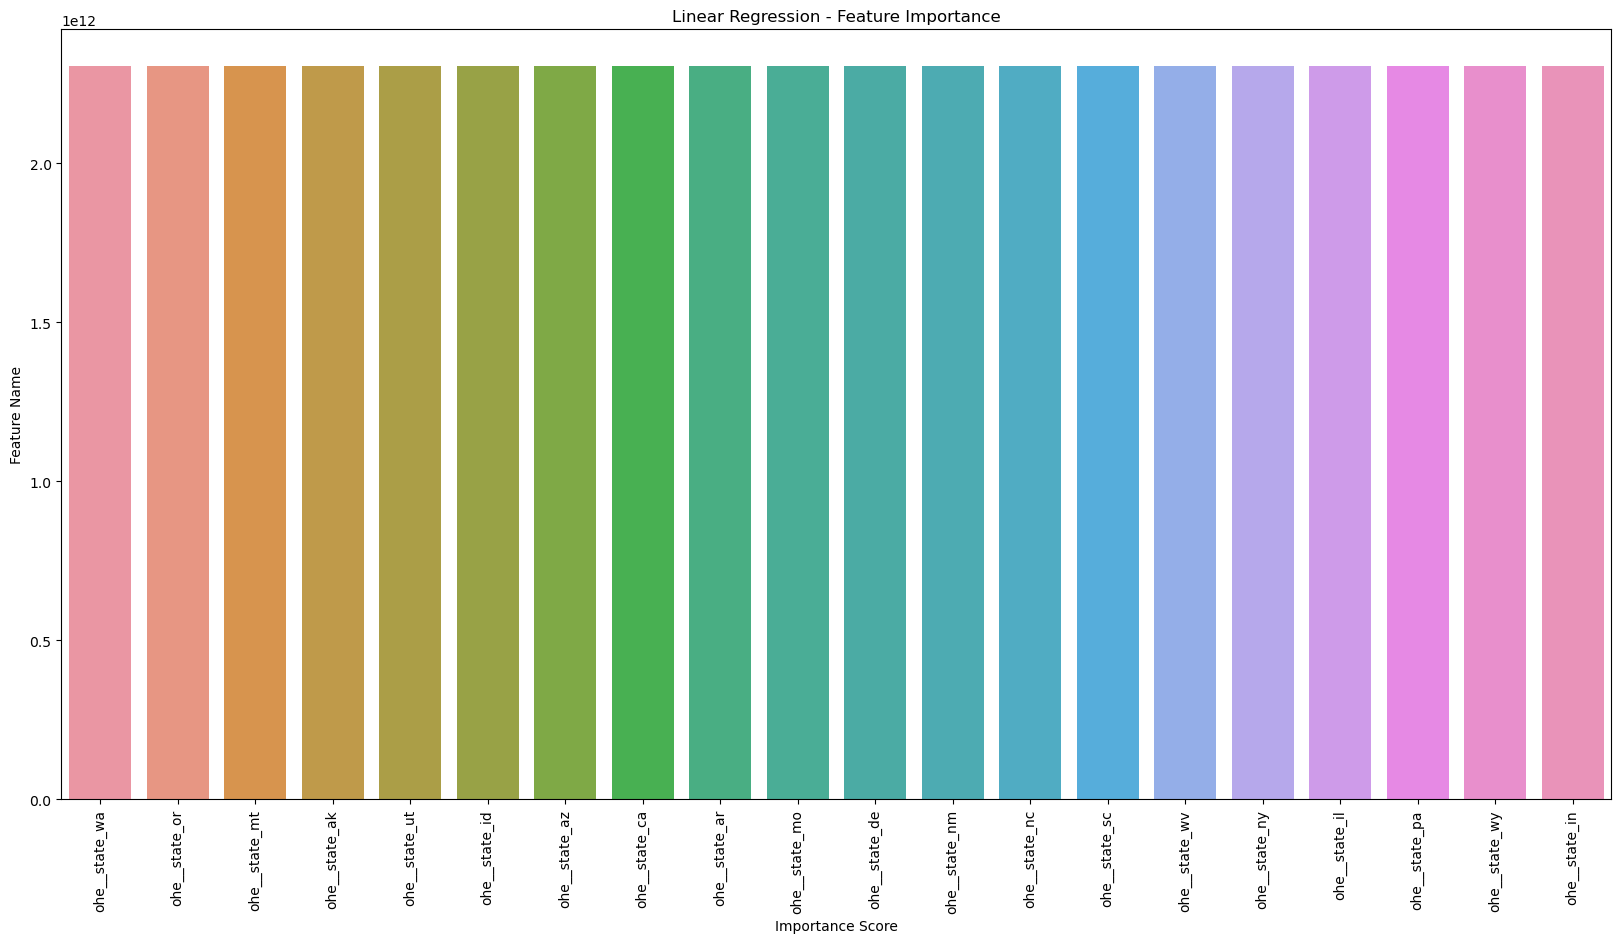

In [86]:
plt.figure(figsize = (20,10))
sns.barplot(data = lr_features.head(20), x='feature', y='importance')
plt.title('Linear Regression - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.xticks(rotation = 90)
plt.show()

In [87]:
# need to map features to original dataset to understand which featureset are important for higher price
lr_features['str split'] = lr_features['feature'].str.split("_")

In [88]:
lr_features

,feature,importance,str split
55,ohe__state_wa,2.304905e+12,"[ohe, , state, wa]"
46,ohe__state_or,2.304905e+12,"[ohe, , state, or]"
37,ohe__state_mt,2.304905e+12,"[ohe, , state, mt]"
15,ohe__state_ak,2.304905e+12,"[ohe, , state, ak]"
52,ohe__state_ut,2.304905e+12,"[ohe, , state, ut]"
...,...,...,...
13,ohe__type_van,-1.324630e+14,"[ohe, , type, van]"
0,ohe__fuel_diesel,-1.145467e+15,"[ohe, , fuel, diesel]"
3,ohe__fuel_other,-1.145467e+15,"[ohe, , fuel, other]"
2,ohe__fuel_hybrid,-1.145467e+15,"[ohe, , fuel, hybrid]"


In [89]:
lr_features['ohe'] = lr_features['str split'].str[0]
lr_features['str split'] = lr_features['feature'].str.split("_")
lr_features['feature_val'] = lr_features['str split'].str[3]
lr_features['feature_m'] = lr_features['str split'].str[2]
lr_features.drop(['feature','str split','ohe'], axis = 1, inplace = True)
lr_features.head()

,importance,feature_val,feature_m
55,2.304905e+12,wa,state
46,2.304905e+12,or,state
37,2.304905e+12,mt,state
15,2.304905e+12,ak,state
52,2.304905e+12,ut,state


In [90]:
lr_features.sort_values(by = ['feature_m','importance','feature_val'])

,importance,feature_val,feature_m
163,-1.694023e+03,NaN,age
1,-1.145467e+15,gas,fuel
2,-1.145467e+15,hybrid,fuel
3,-1.145467e+15,other,fuel
0,-1.145467e+15,diesel,fuel
...,...,...,...
14,-1.324630e+14,wagon,type
12,-1.324630e+14,truck,type
10,-1.324630e+14,other,type
9,-1.324630e+14,coupe,type


In [91]:
# plot 
plot_feature = lr_features['feature_m'].unique()
plot_feature

array(['state', 'mfg model', 'age', 'transmission', 'type', 'fuel'],
      dtype=object)

In [92]:
plot_feature = {'mfg model', 'fuel', 'state', 'transmission', 'type'}
plot_feature_num = {'age'}

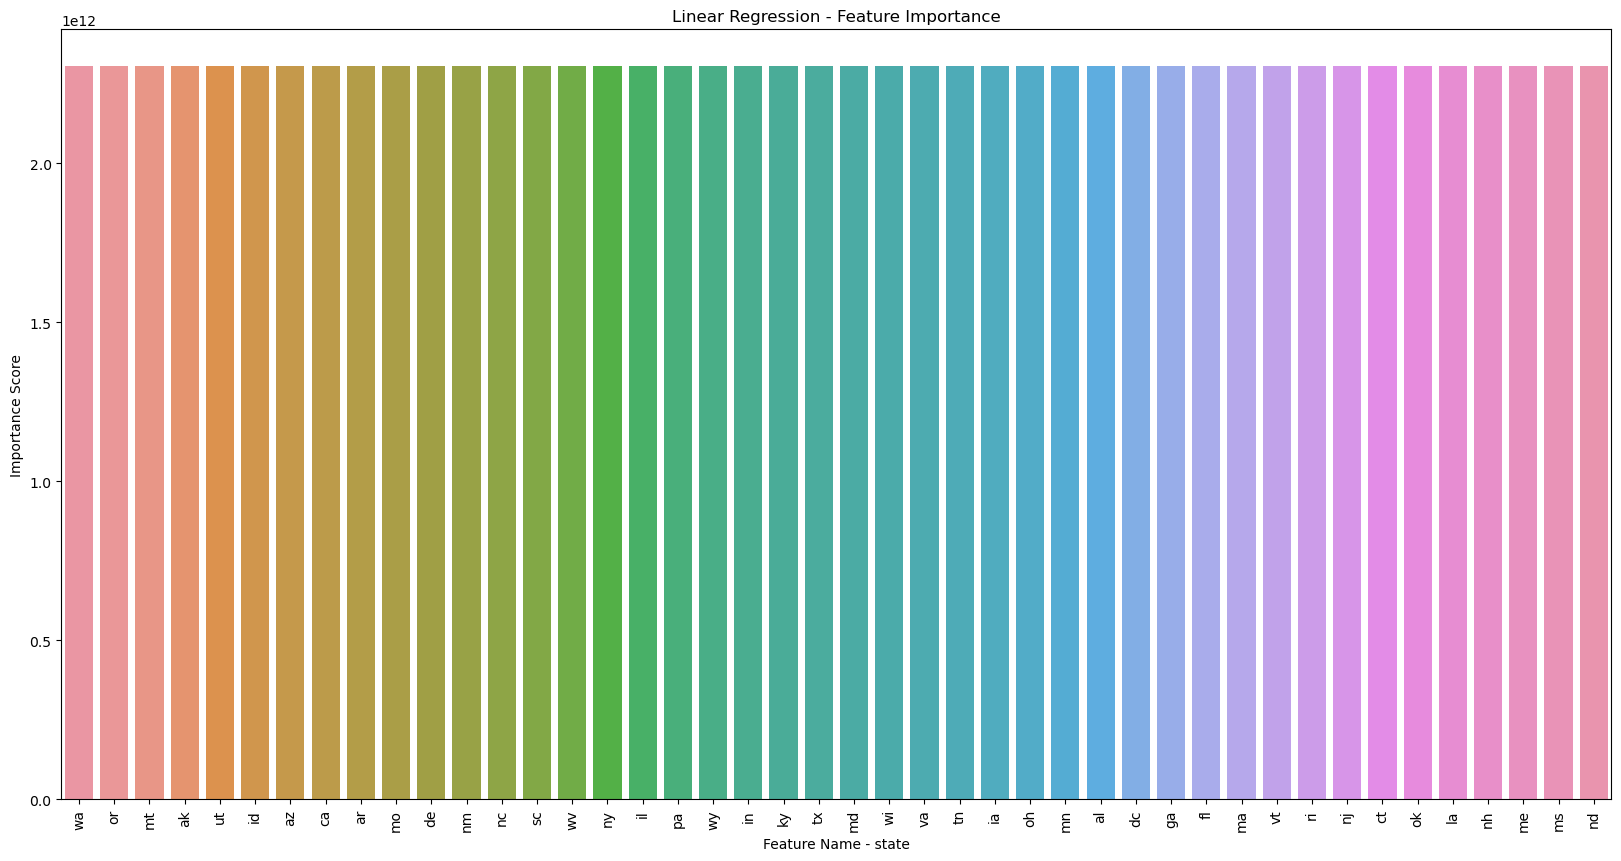

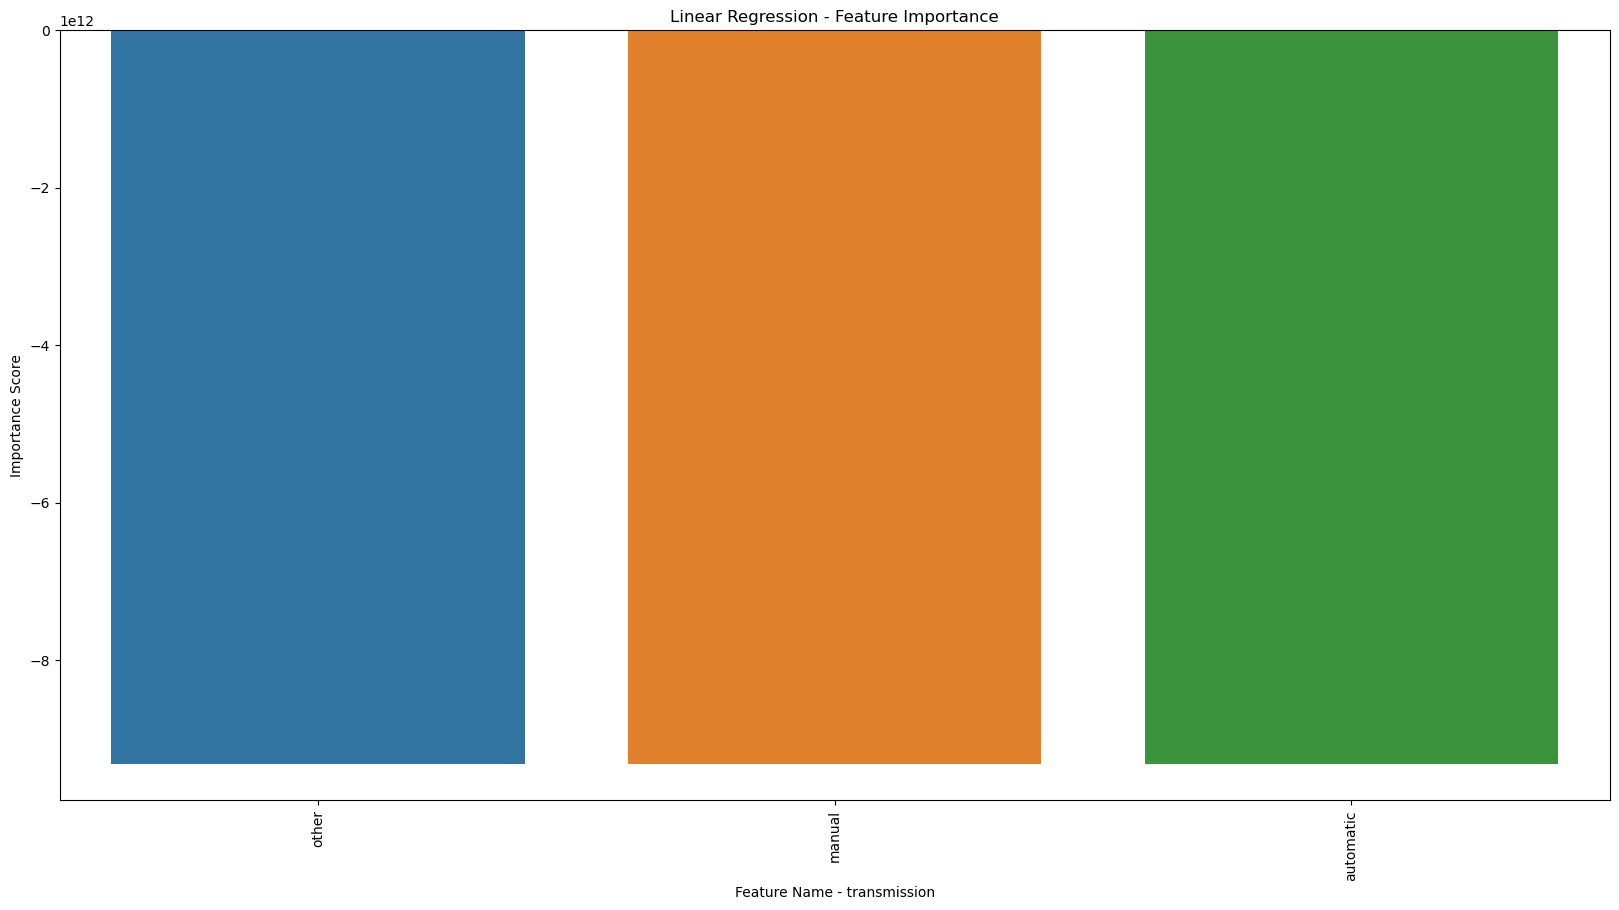

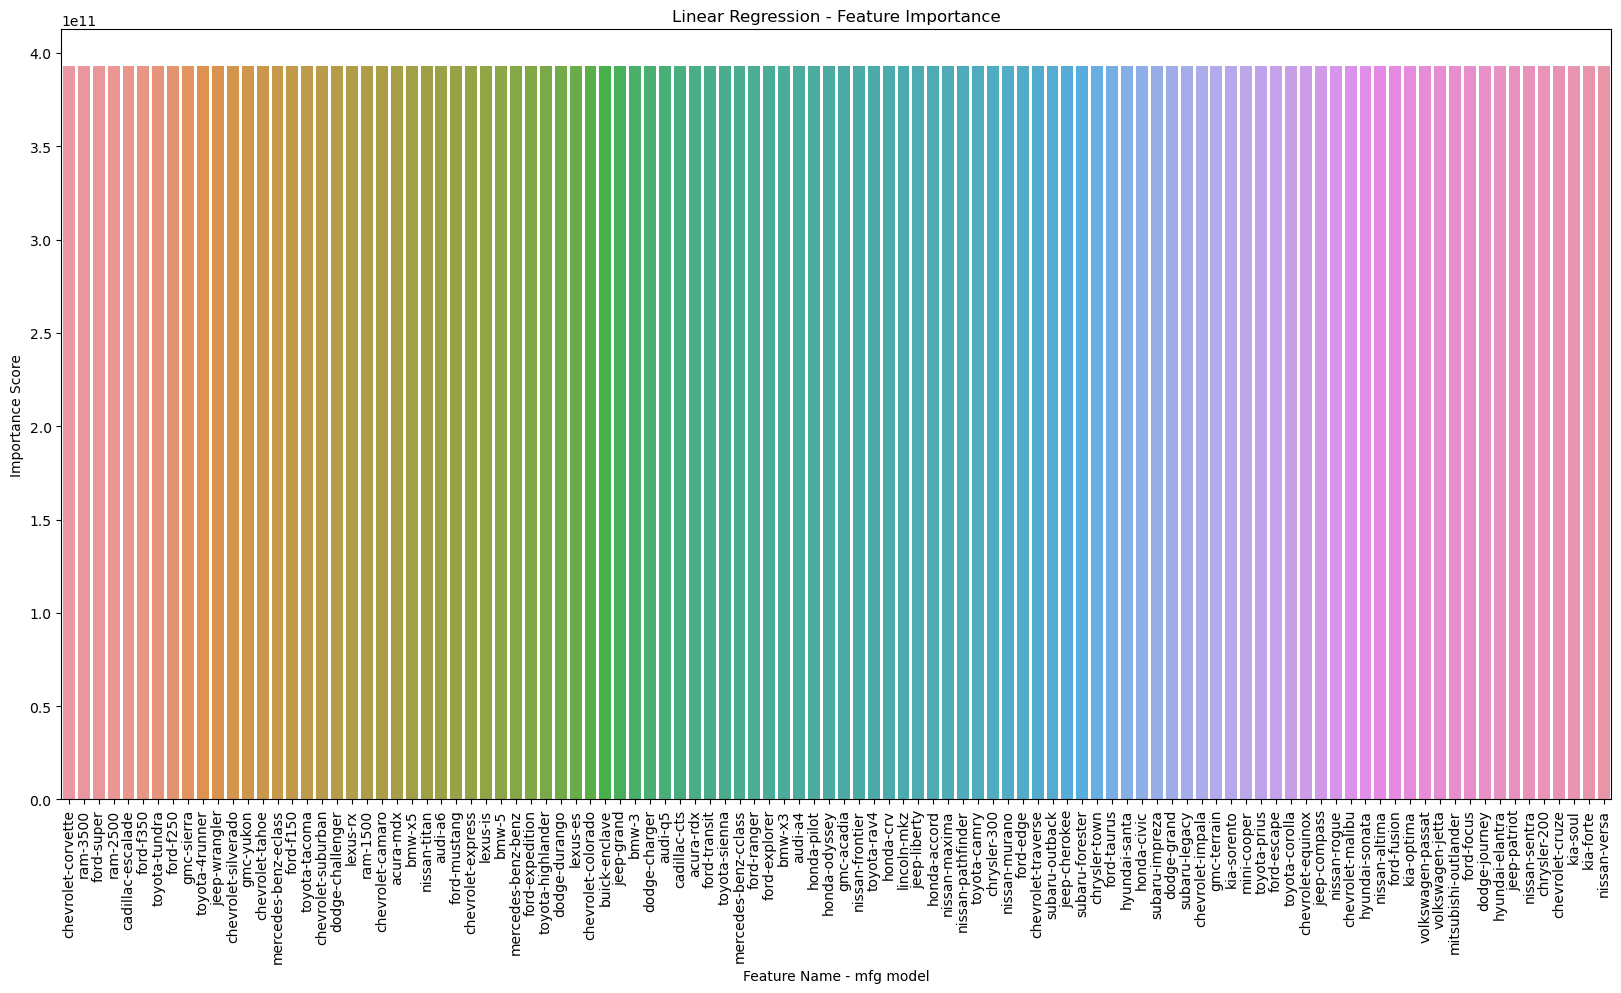

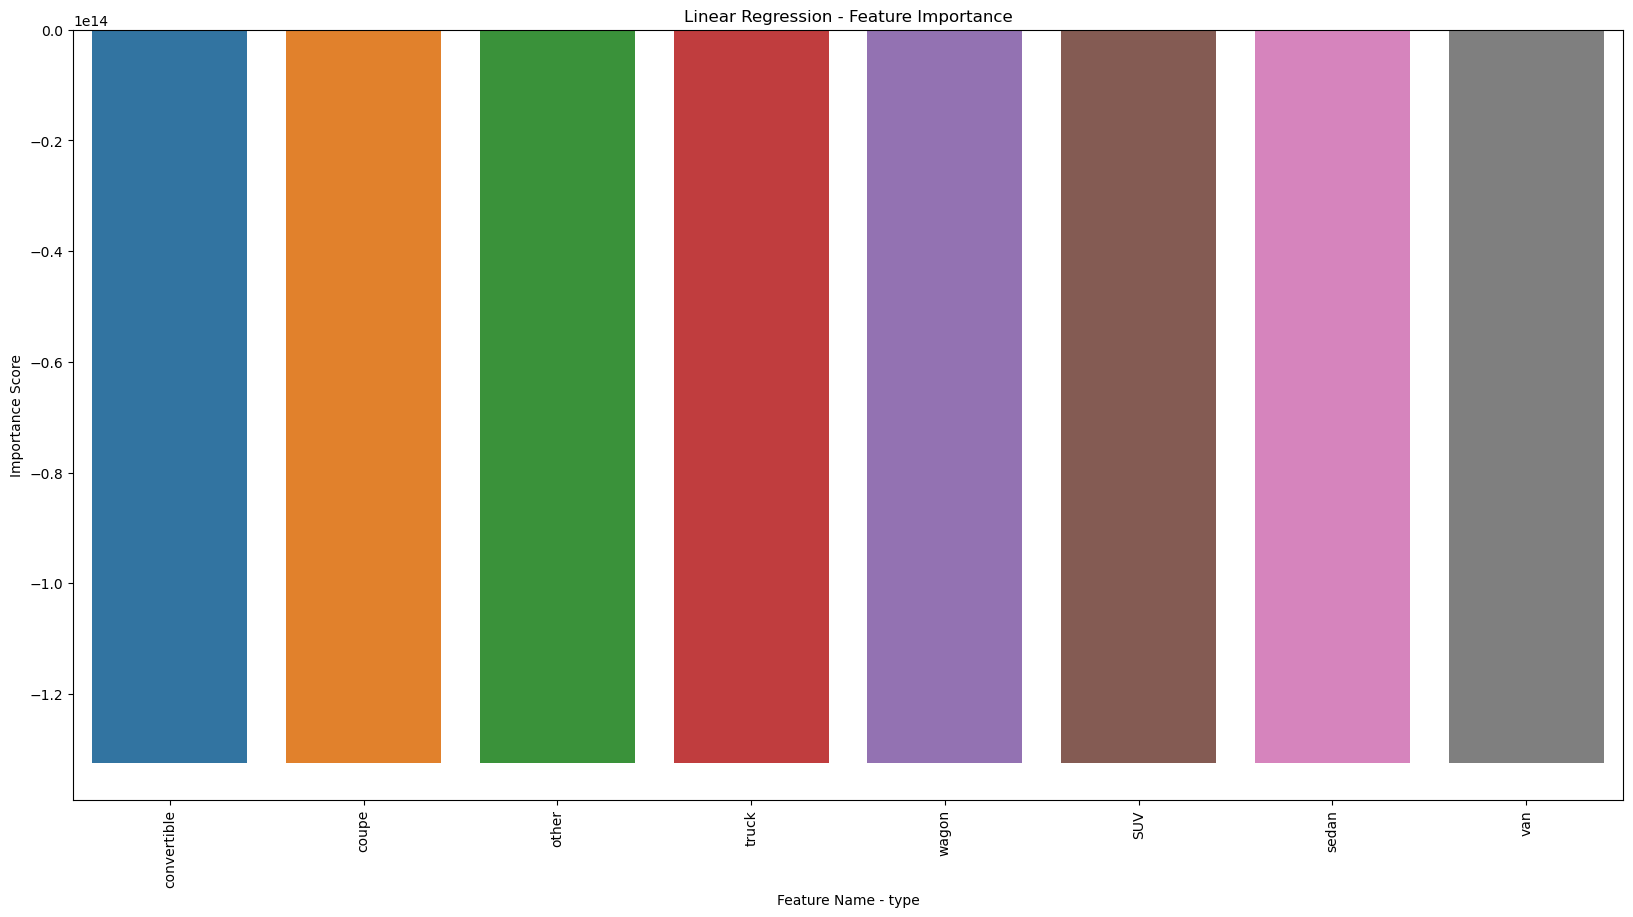

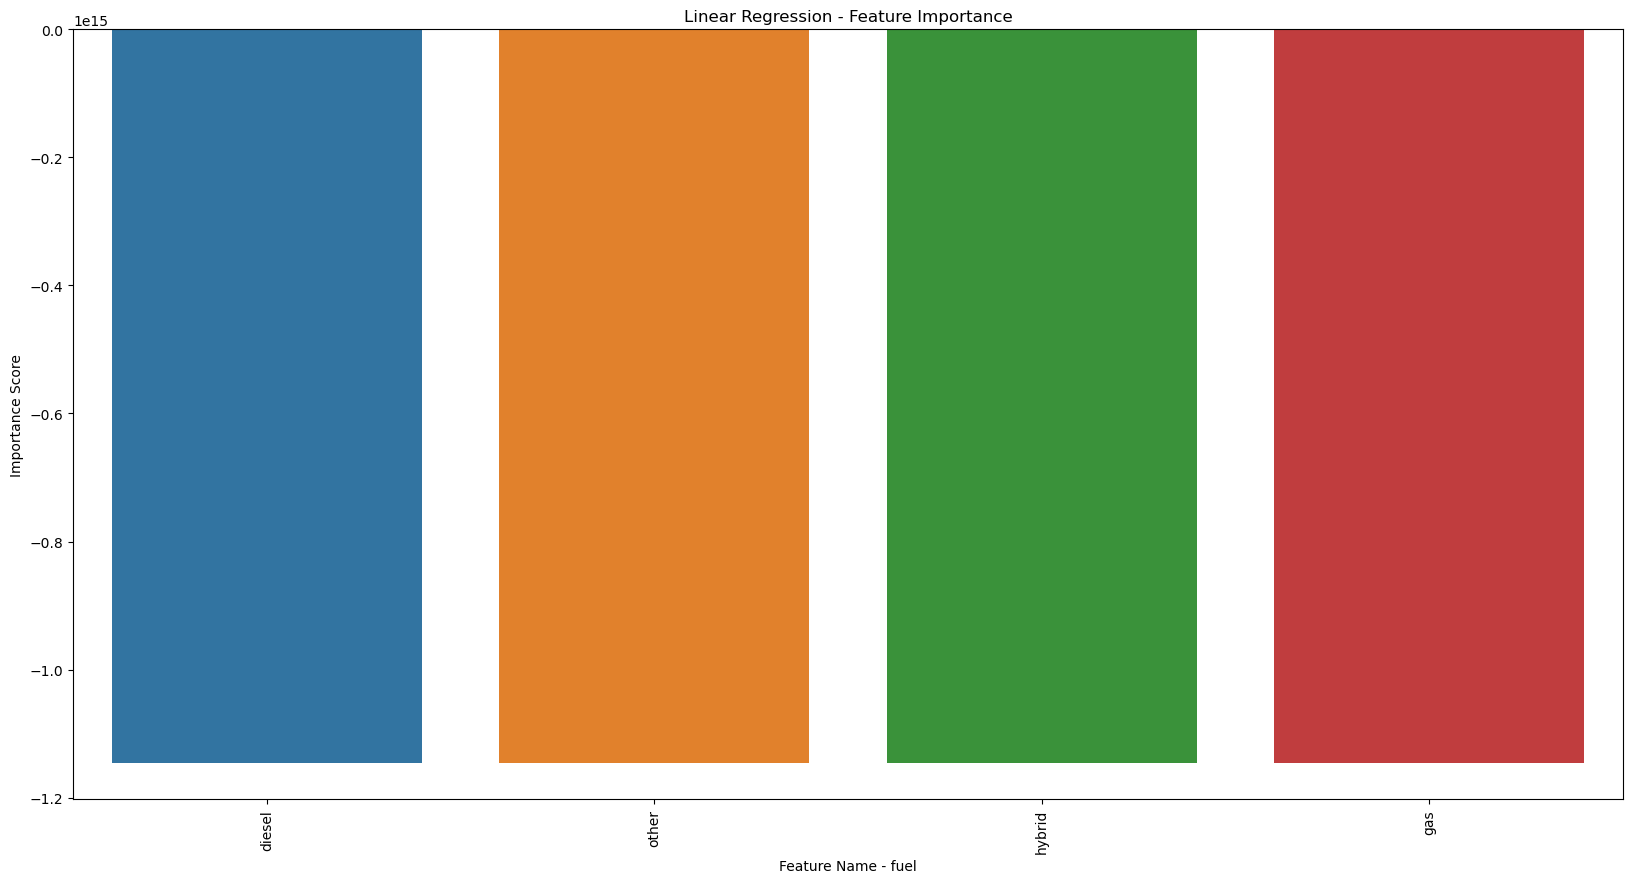

In [93]:
for i, column in enumerate(plot_feature):
    plt.figure(figsize = (20,10))
    sns.barplot(data = lr_features[lr_features['feature_m'] == column], x='feature_val', y='importance')
    plt.title('Linear Regression - Feature Importance')
    plt.xlabel('Feature Name - ' + column)
    plt.ylabel('Importance Score')
    plt.xticks(rotation = 90)
    plt.show()
    

In [94]:
# Features should be normalized over mean age so that importance value would be comparable to others features
lr_features[lr_features['feature_m'] == 'age']

,importance,feature_val,feature_m
163,-1694.023438,NaN,age


In [157]:
from sklearn.preprocessing import StandardScaler
step4 = StandardScaler()

In [139]:
# Creating a regularized model and tune hyperparameters, we need to standardize parameter to be able to compare features importance 
step3 = Ridge(alpha =0.01)

In [159]:
pipe_ridge = Pipeline([('step1',step1),
                       ('scale',step4),
                       ('ridge',step3)])

In [160]:
pipe_ridge.fit(X_train,y_train)

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  [0, 1, 2, 3, 5])])),
                ('scale', StandardScaler()), ('ridge', Ridge(alpha=0.01))])

In [161]:
y_pred = pipe_ridge.predict(X_train)
print('mse is '+ str(mean_squared_error(y_pred,y_train)))
print('r2-score is ' + str(r2_score(y_pred,y_train)))

mse is 32301689.88855104
r2-score is 0.7503618491103188


In [162]:
# Using model on Test Data and getting similar mse and r2
y_pred = pipe_ridge.predict(X_test)
print('mse is '+ str(mean_squared_error(y_pred,y_test)))
print('r2-score is ' + str(r2_score(y_pred,y_test)))

mse is 32591971.718597114
r2-score is 0.7483496518468109


In [163]:
features_names = pipe_ridge.named_steps['step1'].get_feature_names_out()
importance = pipe_ridge.named_steps['ridge'].coef_

In [164]:
ridge_features = pd.DataFrame({'feature':features_names, 'importance':importance})
ridge_features = ridge_features.sort_values('importance', ascending = False)
ridge_features

,feature,importance
73,ohe__mfg model_chevrolet-corvette,1790.326304
79,ohe__mfg model_chevrolet-silverado,1462.323448
106,ohe__mfg model_gmc-sierra,1357.535957
0,ohe__fuel_diesel,1305.841483
102,ohe__mfg model_ford-super,1231.201926
...,...,...
136,ohe__mfg model_nissan-altima,-924.461499
98,ohe__mfg model_ford-focus,-996.621872
126,ohe__mfg model_kia-soul,-998.765246
74,ohe__mfg model_chevrolet-cruze,-1086.324041


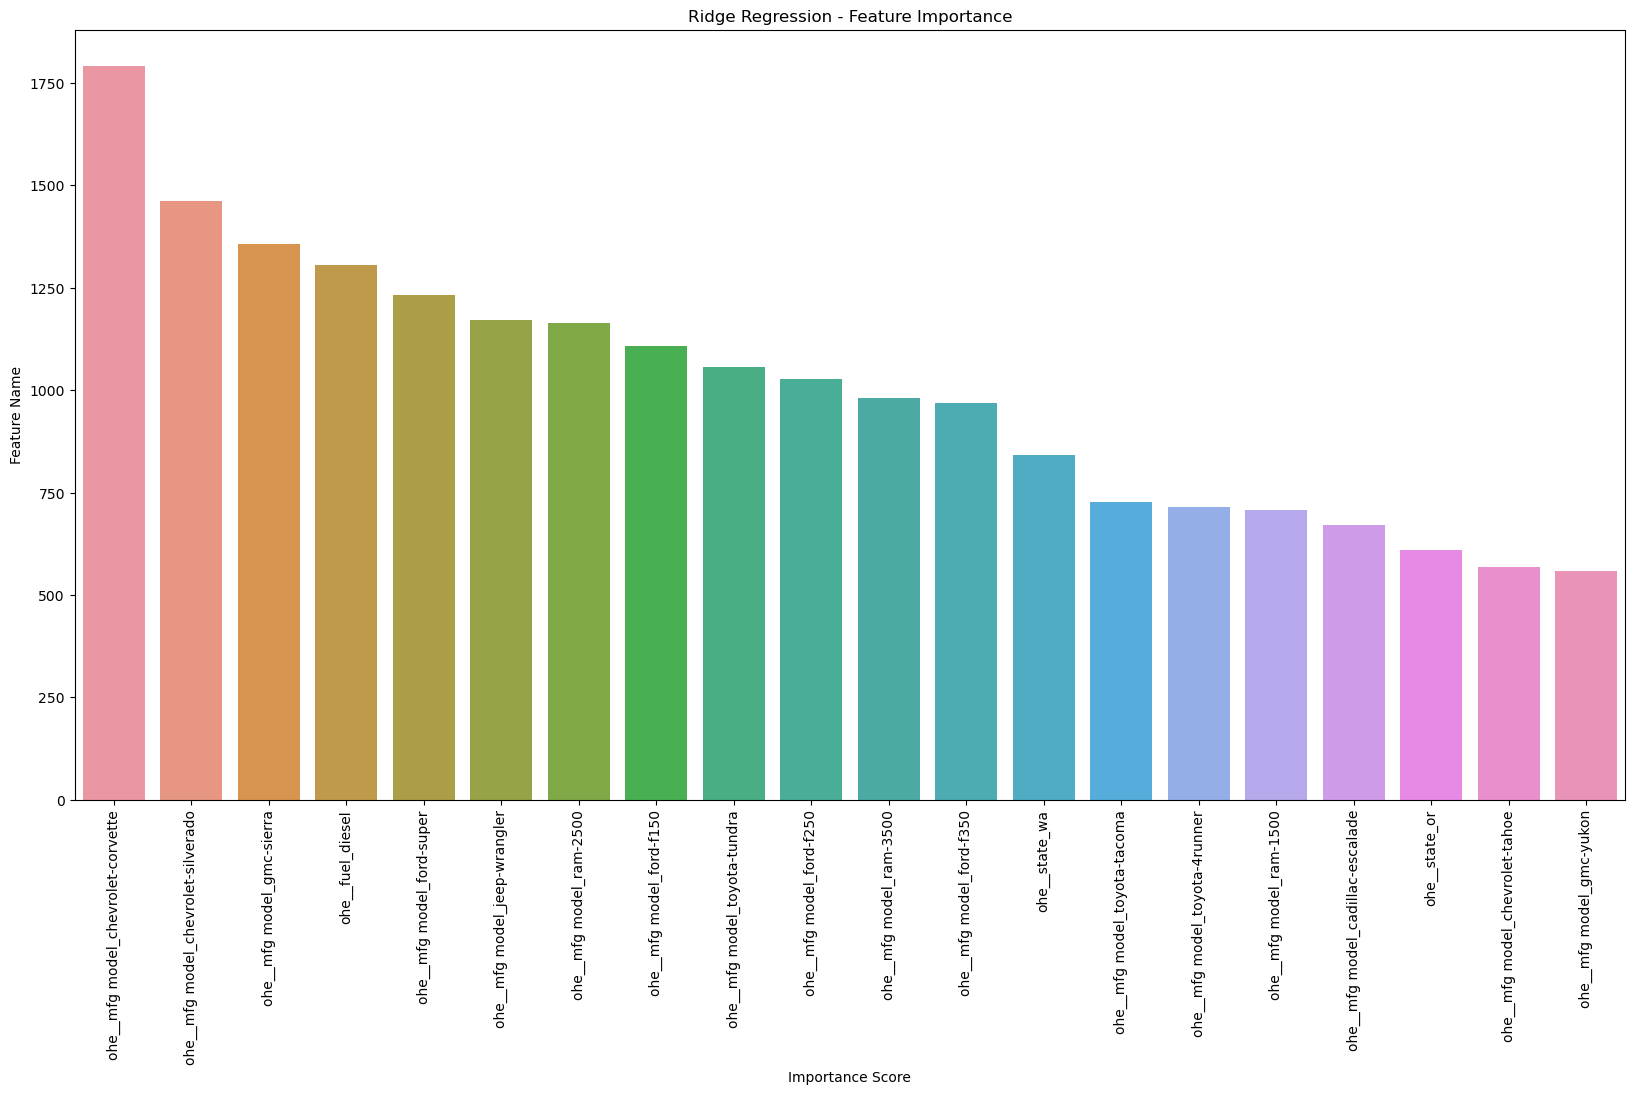

In [165]:
plt.figure(figsize = (20,10))
sns.barplot(data = ridge_features.head(20), x='feature', y='importance')
plt.title('Ridge Regression - Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.xticks(rotation = 90)
plt.show()

In [166]:
# need to map features to original dataset to understand which featureset are important for higher price
ridge_features['str split'] = ridge_features['feature'].str.split("_")
ridge_features['ohe'] = ridge_features['str split'].str[0]

ridge_features['ohe'] = ridge_features['str split'].str[0]
ridge_features['str split'] = ridge_features['feature'].str.split("_")
ridge_features['feature_val'] = ridge_features['str split'].str[3]
ridge_features['feature_m'] = ridge_features['str split'].str[2]
ridge_features.drop(['feature','str split','ohe'], axis = 1, inplace = True)
ridge_features.head()


,importance,feature_val,feature_m
73,1790.326304,chevrolet-corvette,mfg model
79,1462.323448,chevrolet-silverado,mfg model
106,1357.535957,gmc-sierra,mfg model
0,1305.841483,diesel,fuel
102,1231.201926,ford-super,mfg model


In [171]:
ridge_features.sort_values(by = ['feature_m','importance','feature_val'])
plot_feature = ridge_features['feature_m'].unique()

plot_feature = {'mfg model', 'fuel', 'state', 'transmission', 'type'}
plot_feature_num = {'age'}

In [168]:
plot_feature

{'fuel', 'mfg model', 'state', 'transmission', 'type'}

<Figure size 2000x1000 with 0 Axes>

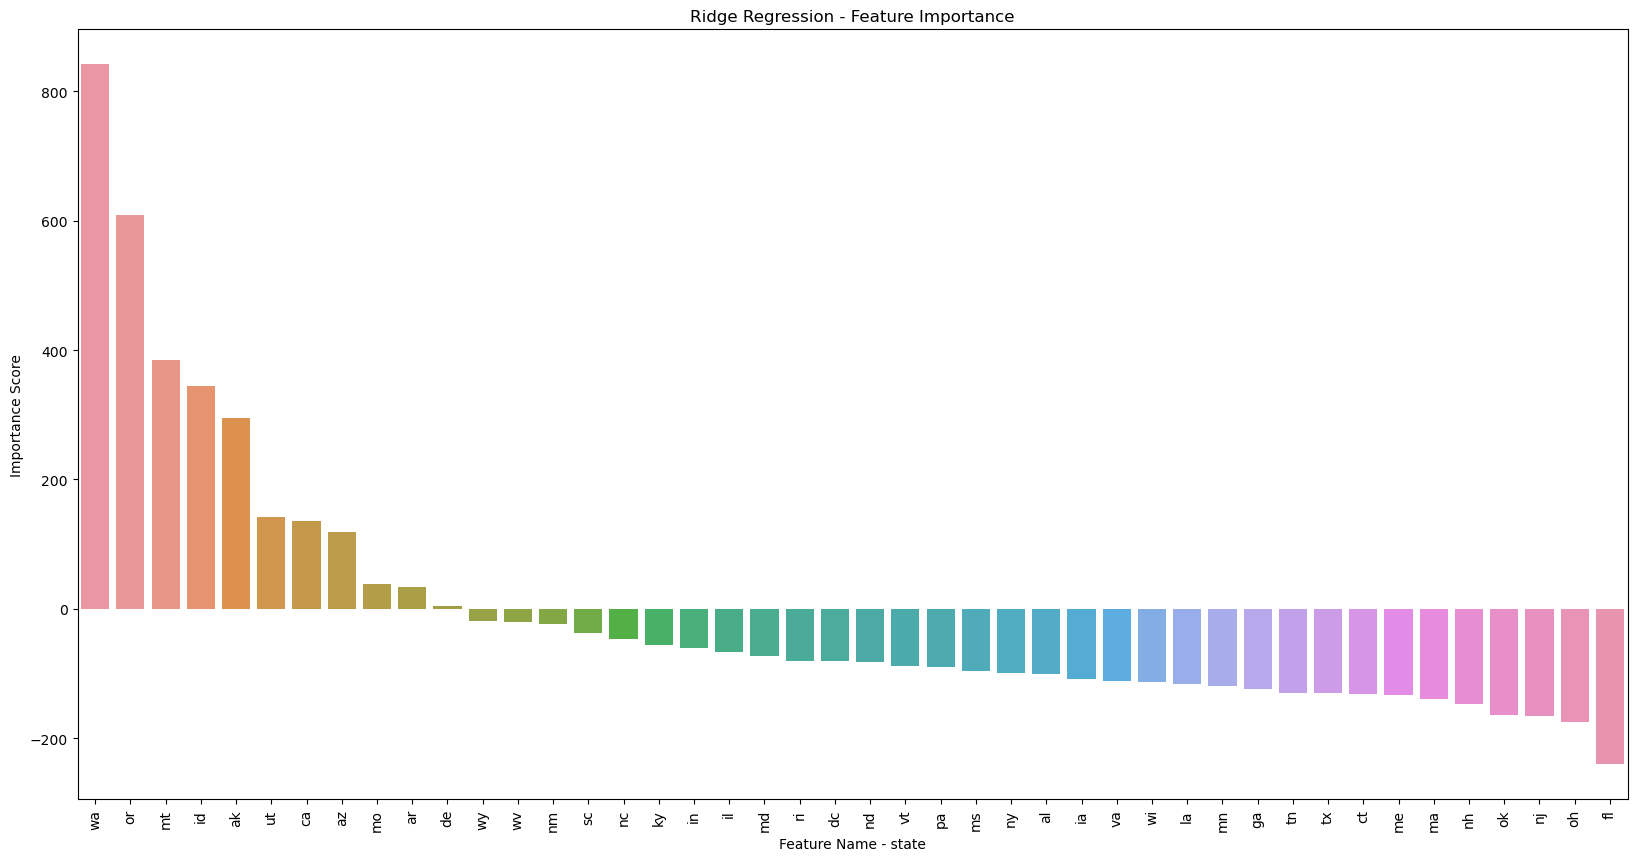

<Figure size 2000x1000 with 0 Axes>

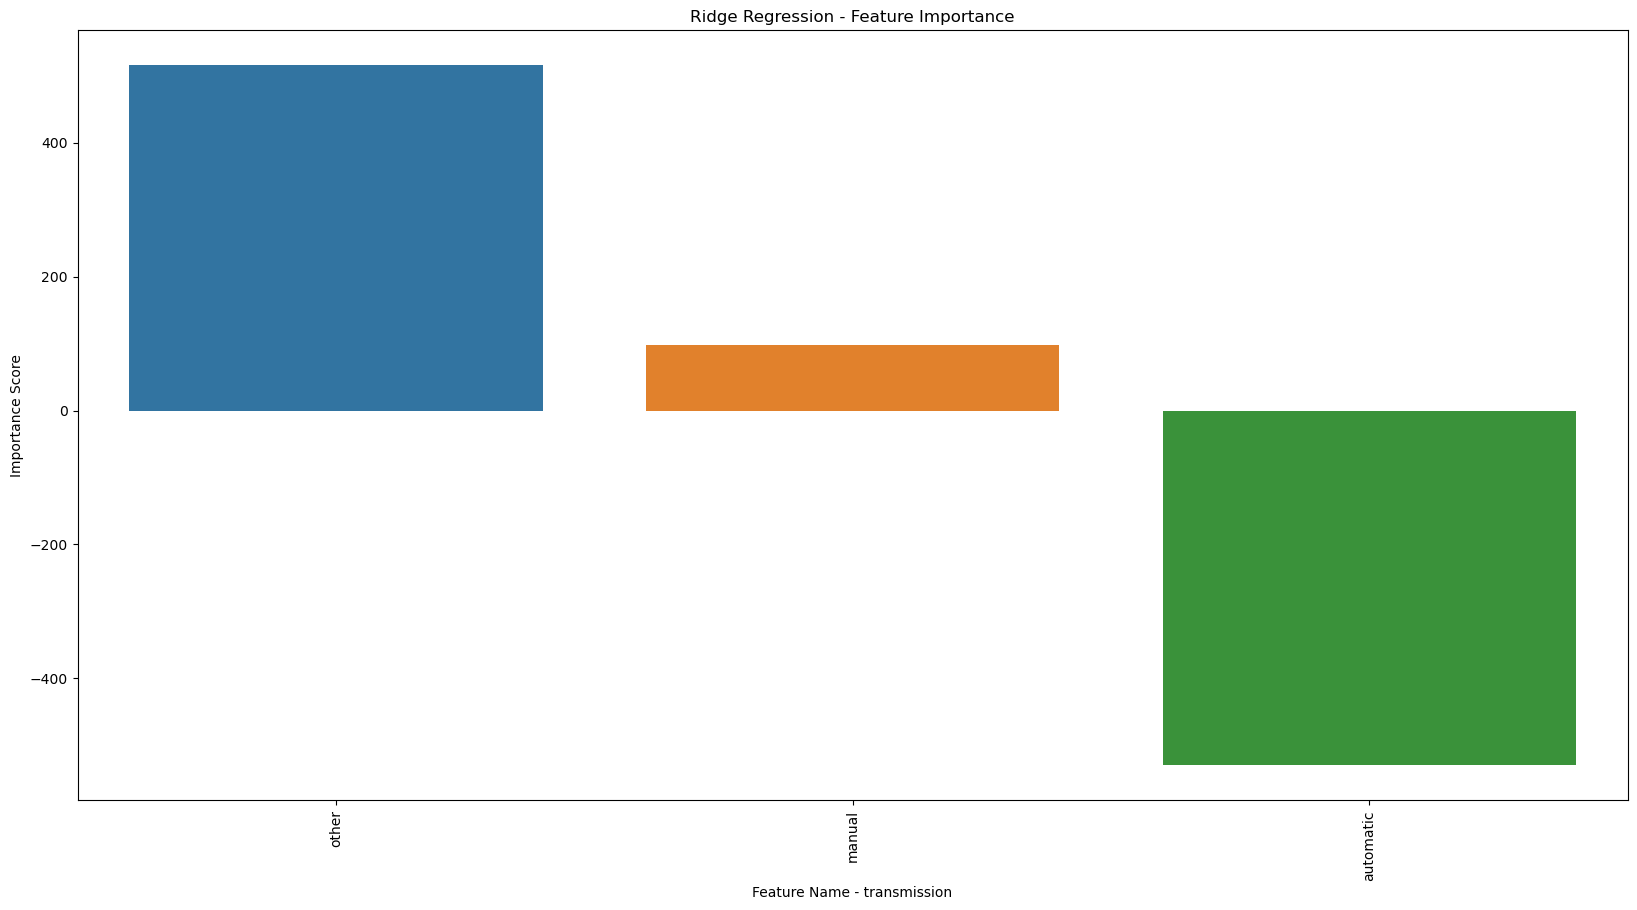

<Figure size 2000x1000 with 0 Axes>

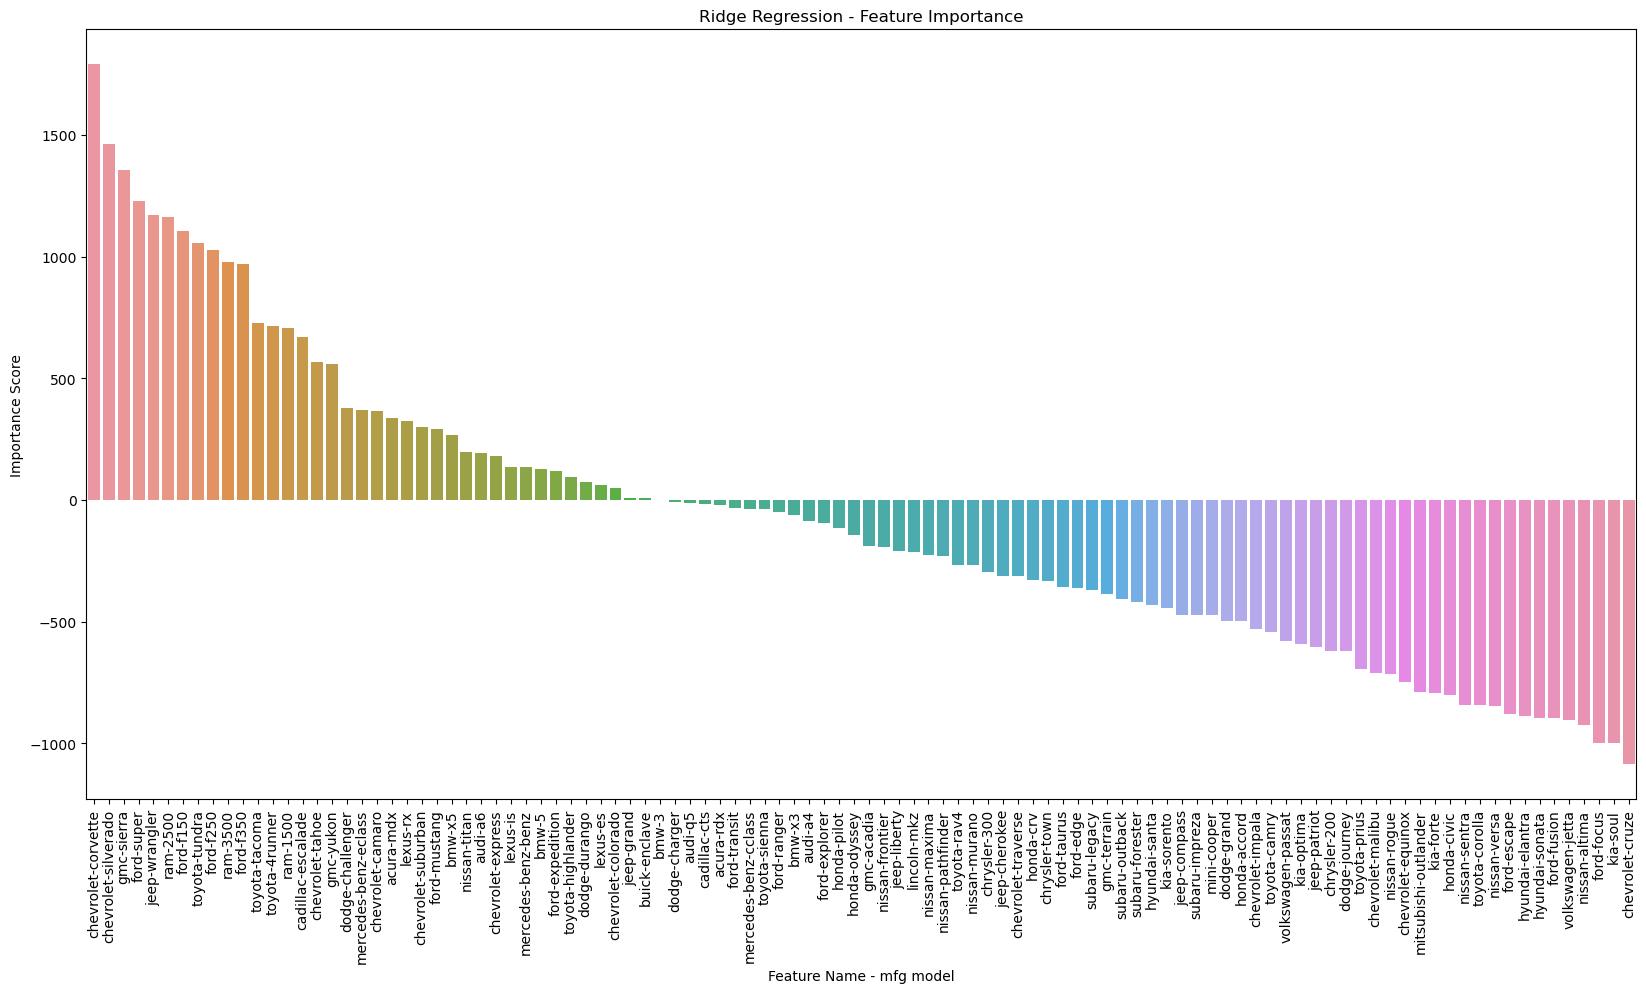

<Figure size 2000x1000 with 0 Axes>

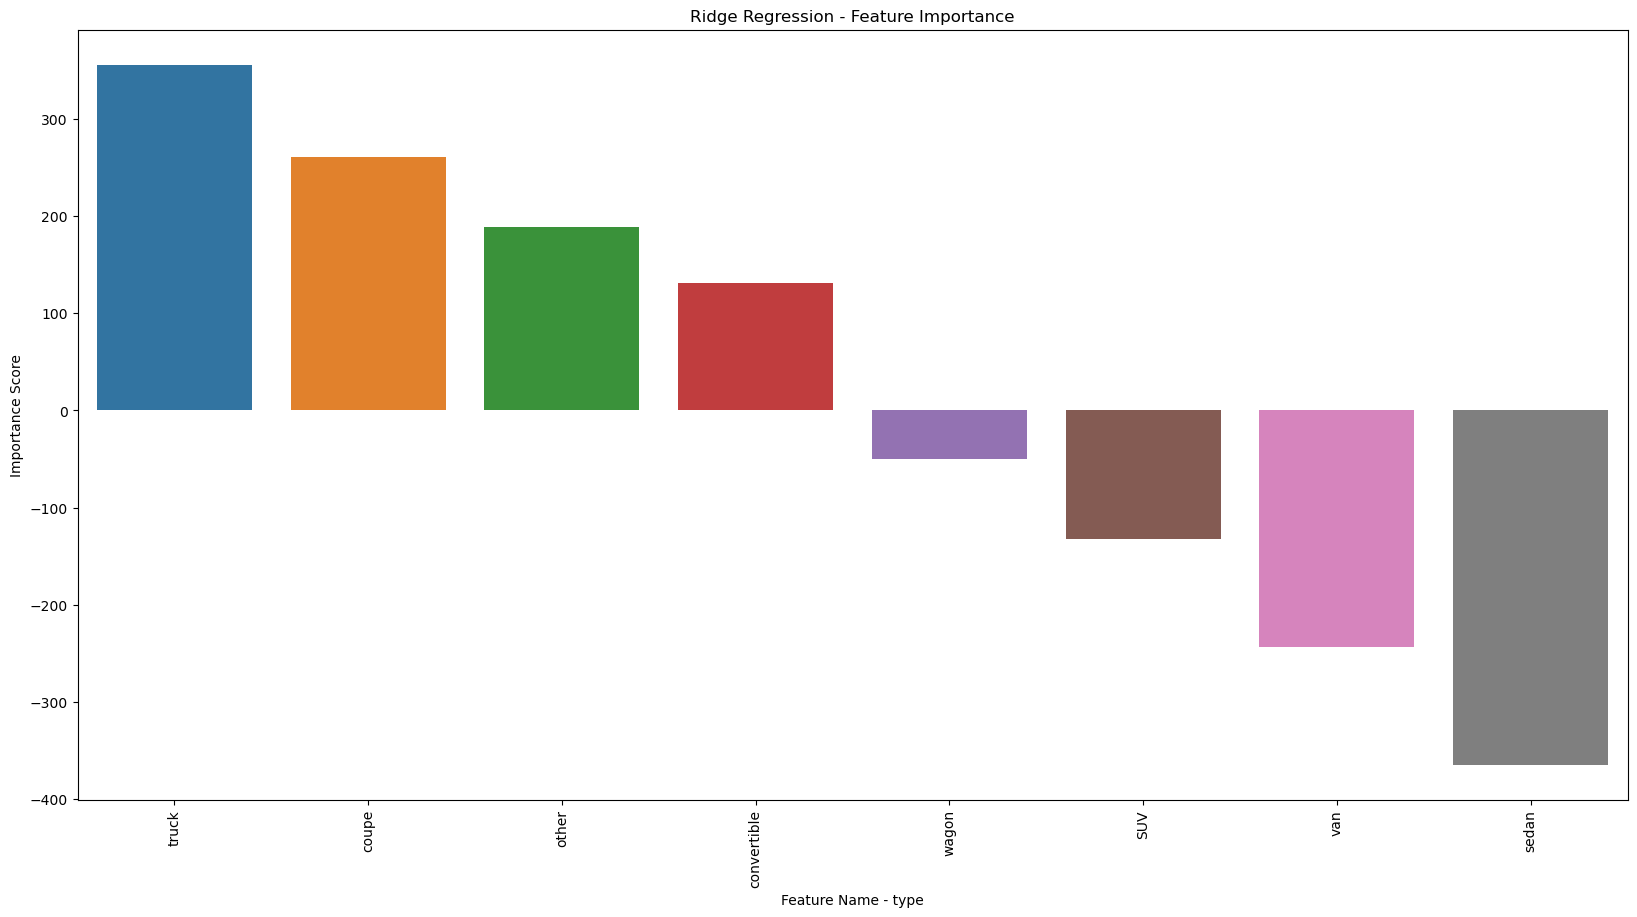

<Figure size 2000x1000 with 0 Axes>

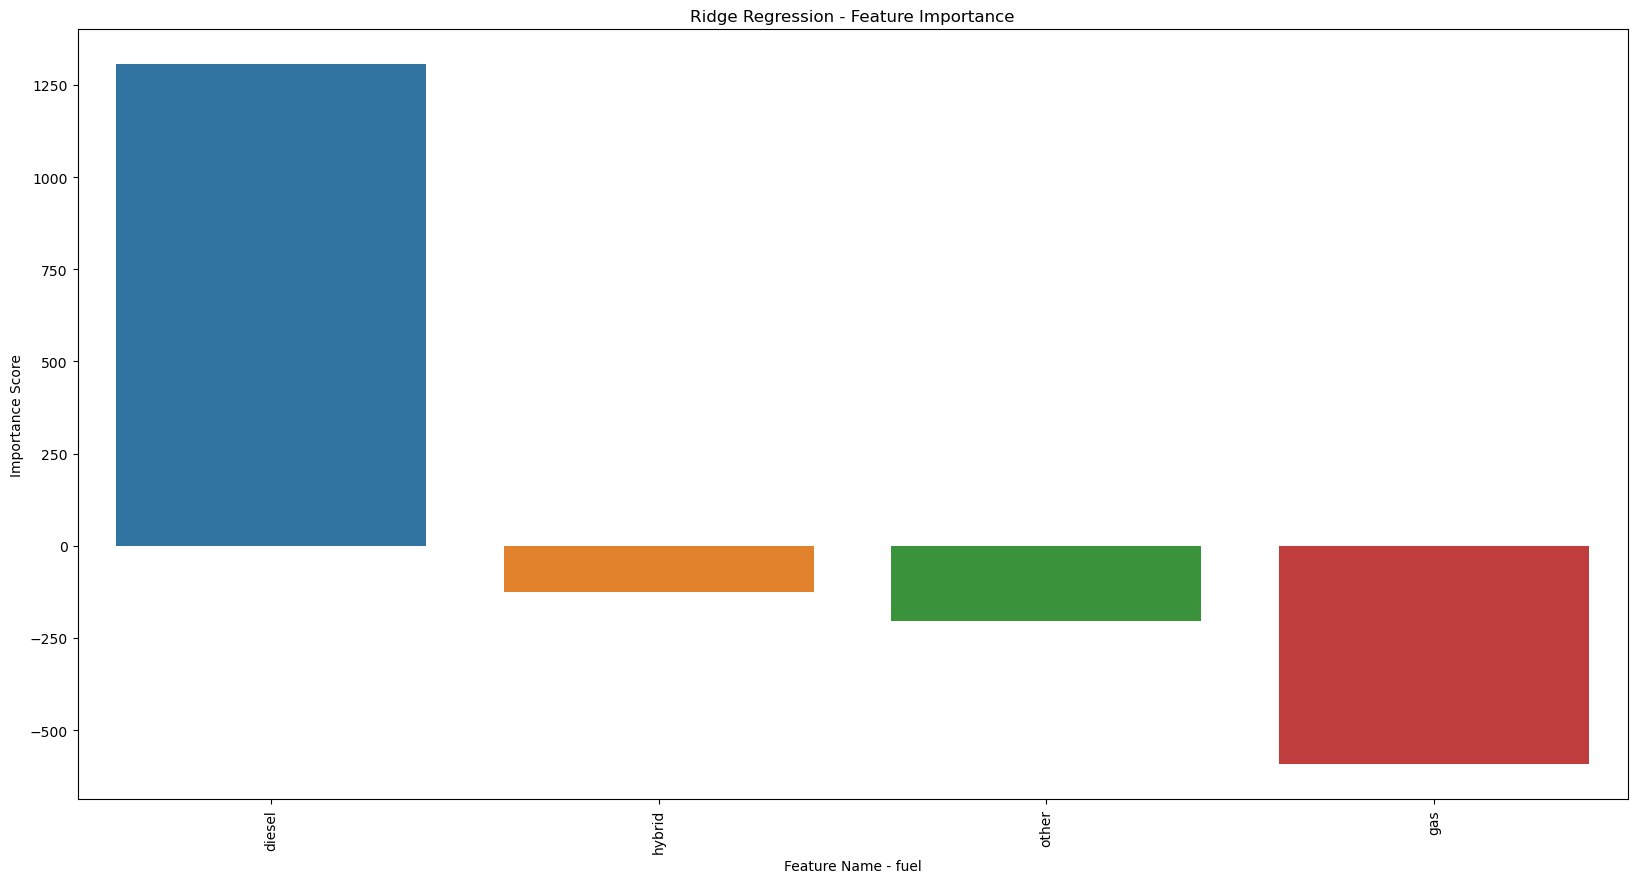

<Figure size 2000x1000 with 0 Axes>

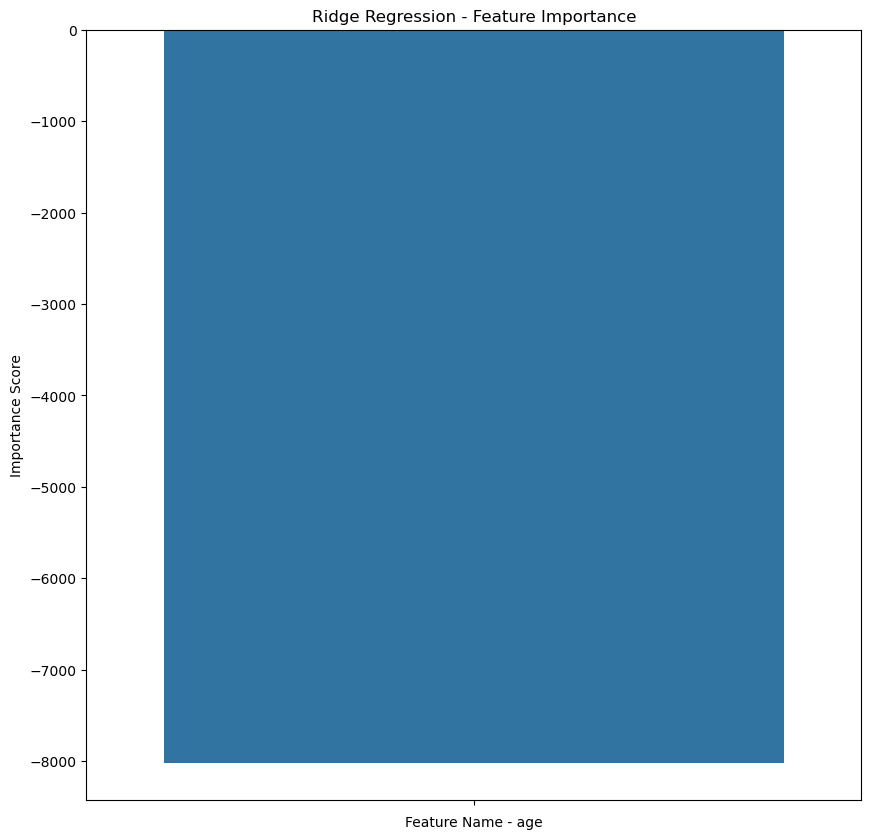

In [177]:
for i, column in enumerate(plot_feature):
    plt.figure(figsize = (20,10))
    if column == 'age':
        plt.figure(figsize = (10,10))
        sns.barplot(data = ridge_features[ridge_features['feature_m'] == column], y='importance')
    else:
        plt.figure(figsize = (20,10))
        sns.barplot(data = ridge_features[ridge_features['feature_m'] == column], x='feature_val', y='importance')
    plt.title('Ridge Regression - Feature Importance')
    plt.xlabel('Feature Name - ' + column)
    plt.ylabel('Importance Score')
    plt.xticks(rotation = 90)
    plt.show()

Text(0.5, 1.0, 'Price by Age')

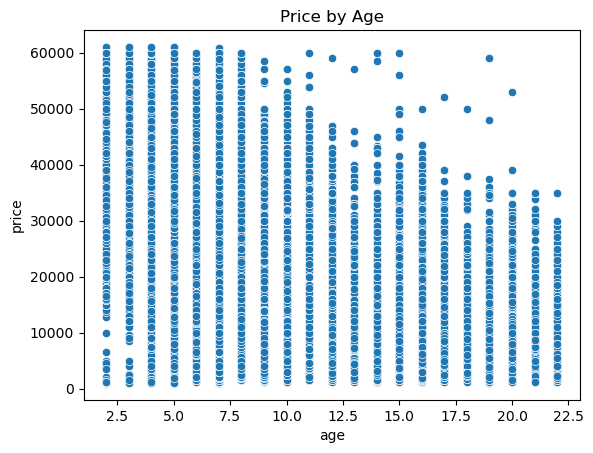

In [170]:
sns.scatterplot(data = df_clean, x = 'age',y='price')
plt.title('Price by Age')

In [156]:
#Grid Search CV
'''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV

pipe_ridge_SFS = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                       ('ridge',step3)])

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(pipe_ridge_SFS, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')
'''

C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\a72016\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different 
regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [107]:
# Odometer should be normalized over mean reading so that importance value would be comparable to others features
# Features should be normalized over mean age so that importance value would be comparable to others features
# Simplify model, manufacturer and state combination 
# Create new complex features that are combination of Manufacturer, Model and Transmission and/or Fuel type 
# and potentially create groups for odometer reading if normalization doesn't give better results  

# For value estimation, models can be categorized into type like trucks, cars, vans etc. as certain type of cars
# are generally higher prices due to their size

# Check for colinearity as age might be related to odometer reading 


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [108]:
# Recommendations
# Ridge regression is better model and overall model is good as r2 is 0.74 for both train and test data

# Choose cars of type truck, convertible and coupes are of higher importance and generally tends to have higher price

# Choose cars with lower age (or lower odometer values) as price drops with age; 

# Choose 'diesel' cars as they favor higher price and prefer 'gas' cars over 'electric' cars. With diesel being an option 
# for very limited car types, and we excluded 'electric' thus, it's a less important factor as most cars are 'gas'.

# Cars with transmission type as 'other' favor higher price but it might be due to the fact that data is not known 
# and it might be the car model that drives the price

# Age is the primary factor defining the value of car, so choosing car with low age 